In [1]:
#Including all the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv('Bengaluru_House_Data.csv')
df1.head()                          # shows the first 5 rows of the table.

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape                          # 13320 numbers of Rows and 9 columns. 

(13320, 9)

In [4]:
df1['area_type'].value_counts()    # value_counts() Gives the frequnecy table.

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [5]:
df1.isnull().sum()                # 'Society' col. is having a large number of null values and similarly for 'Balcony' also. 
                                  #  So we can drop that columns ("to keep the problem simple for us for the time being")

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df2=df1.drop(['society','balcony','availability','area_type'],axis=True)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df3=df2.dropna()                  # For keeping the problem simple iam removing all the null values straight forward.
df3.isnull().sum()                # No null values left.

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df3['size'].unique()            # Gives the all the unique values which are present in the col. 'size'.
                                # We can seen that 2BHK and the 4Bedroom are meant to be same. So we have to make all entry same
                                # Like all numeric values in BHK only.

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
# We have used the lambda funtion to split the string into 2 parts, one is the numeric value and the second one is the string.
# So we have taken the numeric part only and created a new col. named "BHK". Now we don't have to worry about the string written
# Like Bedroom,BHK,RK.

In [11]:
df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))    

<ipython-input-11-b5ee207754b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [12]:
df3.drop('size',axis=True,inplace=True)
df3.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [13]:
df3['BHK'].unique()               # We have 43 BHK which is quite strange.

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
df3[df3['BHK']>20]               # It is an error to be because in 2400sqft how we can have 43 BHK.

,location,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [15]:
# Let's Explore the total_sqft.
df3['total_sqft'].unique()        # We have Range also, We have to convert into a single number.

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
# Now we will check the value are in float or not.
# This function will try to convert the values into float but if it cannot convert the number then it will return False otherwise True.
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
    

In [17]:
df3[~df3['total_sqft'].apply(is_float)].head(20)       # We have Ranges,Sq.Meter,Yards,Perch etc.
                                                       # For simplicity i will take avg. of range values and numeric values of 
                                                       # Perch,Yards and Sq. Meter.

,location,total_sqft,bath,price,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [18]:
# The Fucntion Converts the Range Values to float number by taking avg.

In [19]:
def convert_range_to_num(x):
    token=x.split('-')
    if (len(token)==2):
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [20]:
convert_range_to_num('633-666')

649.5

In [21]:
convert_range_to_num('1025')

1025.0

In [22]:
convert_range_to_num('1025Perch')      # Giving no output it's fine. We are Ingnoring such values.

In [23]:
df4=df3.copy()                        # We have made a deep copy of df3. Now we are applying the "convert_range_to_num" func.
                                      # Which will convert the ranges to floating number by taking avg.
df4['total_sqft']=df4['total_sqft'].apply(convert_range_to_num)
df4.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [24]:
df4.loc[30]                        # At index 30 we were having the range perviously and now we are having the floating number.

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [25]:
df4.head(3)

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3


In [26]:
# We have total_sqft and price, so we can calculate the price per sqft.To find the outliers.
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [27]:
len(df5['location'].unique())       # We are having 1304 Unique Locations.

1304

In [28]:
# Now we have to see like, each locations have how many entries.
df5.location=df5.location.apply(lambda x: x.strip())    # The strip() removes the extra spaces present at beginning and at the ending. 

location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)   
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [29]:
len(location_stats[location_stats<=10])                        # 1052 locations having less than 10 entries.
location_stats_less_than_10=location_stats[location_stats<=10] 

In [30]:
# Now the locations having the less than 10 enteries we will consider those as 'Other'. Which will reduce the complexity.
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [31]:
# Now we are going to remove some outlier. Like per bhk we should have around 300 sqft('This we have to ask from a real state expert').
df5[df5['total_sqft']/df5['BHK']<=300]  # These values are outlier. We have to remove it.

,location,total_sqft,bath,price,BHK,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...
13281,Margondanahalli,1375.0,5.0,125.0,5,9090.909091
13300,Hosakerehalli,1500.0,6.0,145.0,5,9666.666667
13303,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649
13306,other,1200.0,5.0,325.0,4,27083.333333


In [32]:
df6=df5[~(df5['total_sqft']/df5['BHK']<=300)] # We have removed the outliers by using negate operator.
df6.shape

(12320, 6)

In [33]:
df6['price_per_sqft'].describe()   # In this 'price_per_sqft' we have some values which are very less and some values very high.

count     12274.000000
mean       6211.880230
std        4053.214807
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.474875
max      176470.588235
Name: price_per_sqft, dtype: float64

In [34]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7=remove_pps_outliers(df6)
df7.shape

(10016, 6)

In [35]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8=remove_bhk_outliers(df7)
df8.shape

(7164, 6)

Text(0, 0.5, 'Count')

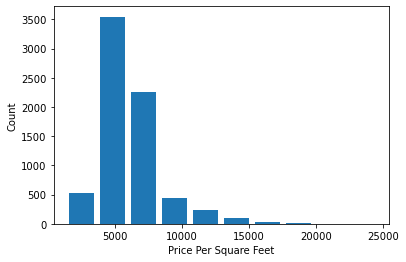

In [36]:
import matplotlib                                 # It's like a normal curve or bell curve.
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")


In [37]:
df8['bath'].unique()                # We have 16 bathroom. Which is Weird thing. This seems outliers to me

array([ 4.,  3.,  2.,  8.,  5.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [38]:
df8[df8.bath>df8.BHK+2]            # All of these are outliers.

,location,total_sqft,bath,price,BHK,price_per_sqft
1565,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5099,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6562,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8232,other,11338.0,9.0,1000.0,6,8819.897689


In [39]:
df9=df8[df8.bath<df8.BHK+2]
df9.shape

(7088, 6)

In [40]:
df10=df9.drop('price_per_sqft',axis=True)
df10.head(3)

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [41]:
dummies=pd.get_dummies(df10['location'])


In [42]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head(3)

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df12=df11.drop('location',axis=True)
df12.head(3)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df12.shape

(7088, 245)

In [45]:
X=df12.drop('price',axis=True)
X.head(3)

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
Y=df12['price']
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [48]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.8751466170466126

In [49]:
# ***BELOW THIS I HAVE TAKEN HELP.


In [50]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model,f)

In [51]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))